In [3]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for modeling 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [4]:
data = pd.read_csv('Signal-data.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(data.shape)

(1567, 592)


In [5]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,...,NaN,0.4948,0.0117,0.0034,2.3737,0.0184,0.0151,0.0042,82.0989,NaN
1,22-07-2008 14:00,2988.30,2519.05,2208.8556,1157.7224,1.5509,100.0,107.8022,0.1233,1.5362,...,47.1586,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,NaN
2,22-07-2008 15:30,2987.32,2528.81,NaN,NaN,NaN,NaN,NaN,0.1195,1.6343,...,NaN,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,NaN
3,23-07-2008 05:15,NaN,2481.85,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5559,...,34.4153,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,NaN
4,23-07-2008 19:22,3002.27,2497.45,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5465,...,114.5979,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,NaN


In [6]:
data = data.drop(['Time'], axis=1)

In [7]:
data.isna().sum()

0            24
1            25
2            32
3            32
4            32
             ..
586          18
587          18
588          18
589          18
Pass/Fail    18
Length: 591, dtype: int64

In [8]:
data = data.fillna(data.median())
# again, checking if there is any NULL values left
data.isnull().sum().any()

False

# Data Visualisation

In [9]:
unique_vals = data['Pass/Fail'].unique()  
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

/home/kaustubh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kaustubh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/kaustubh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kaustubh/.local/lib/python3.8

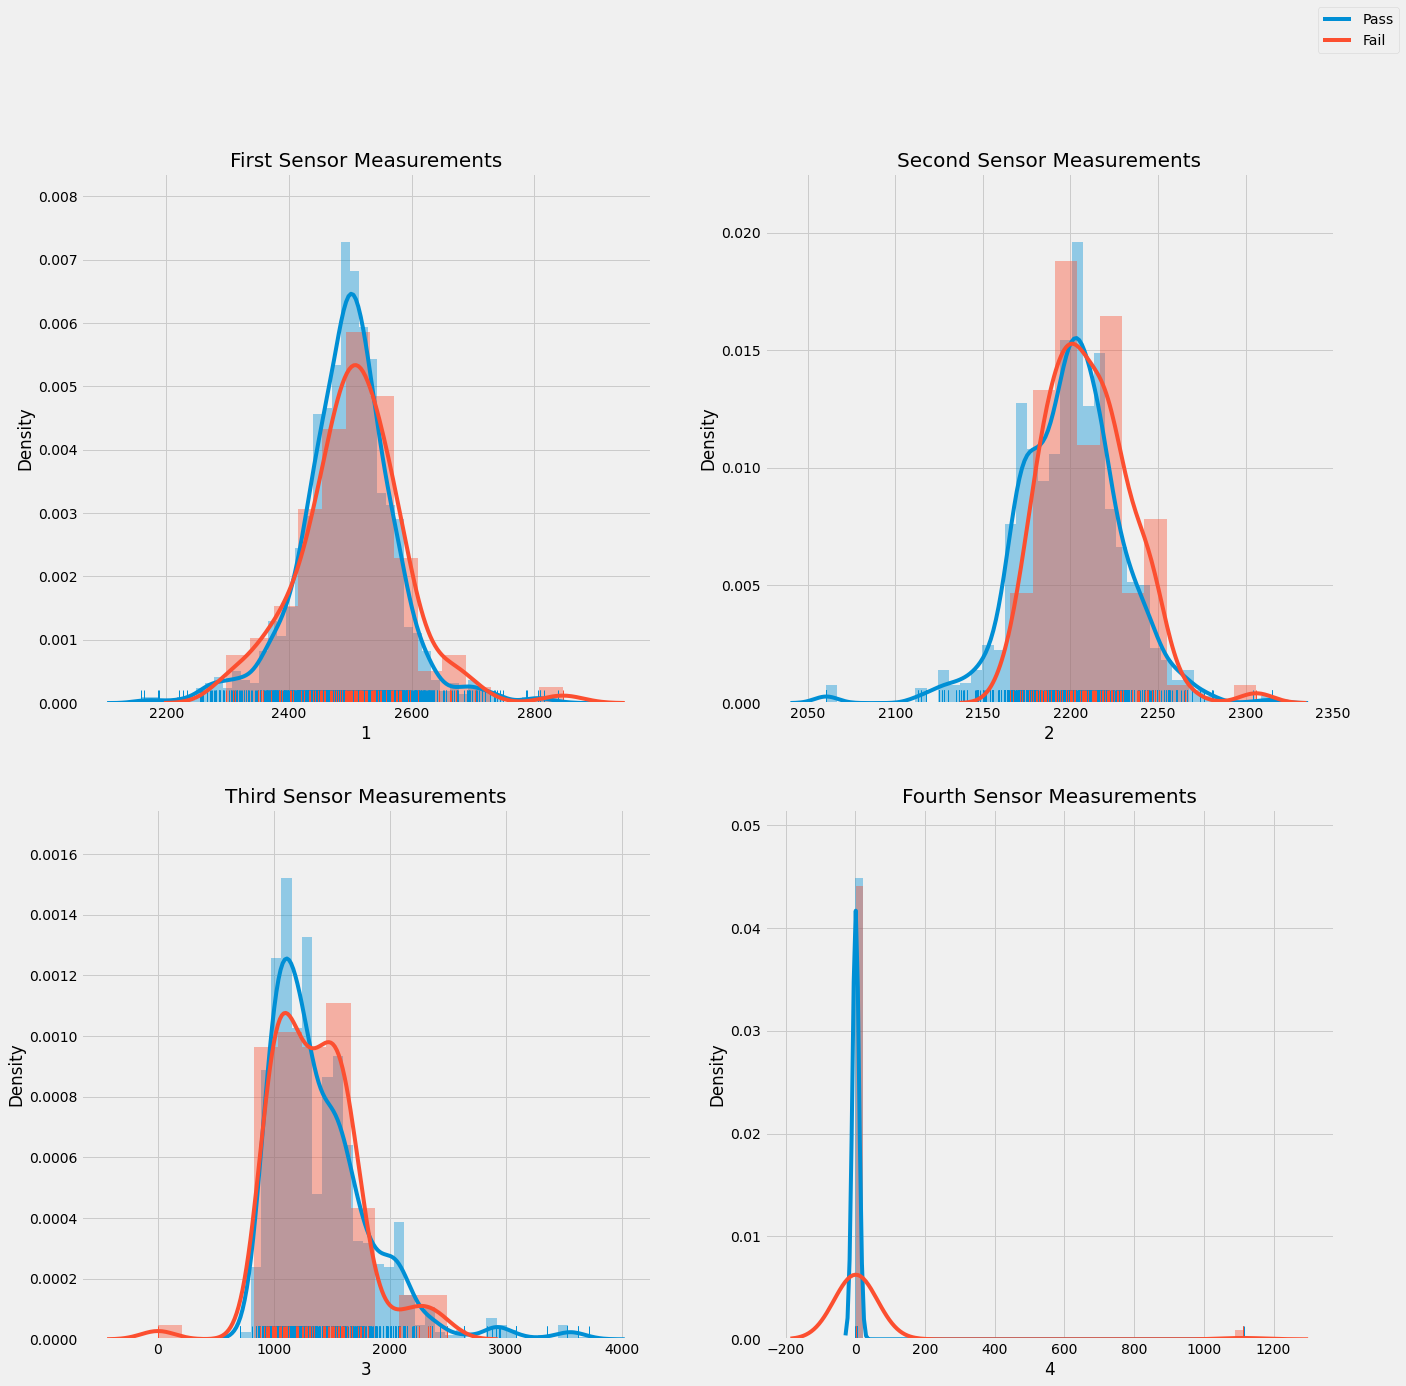

In [10]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()


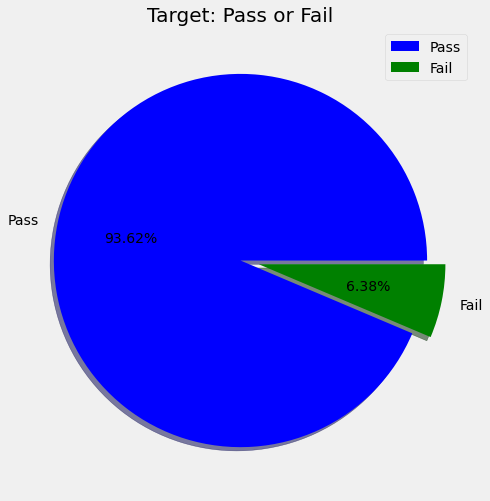

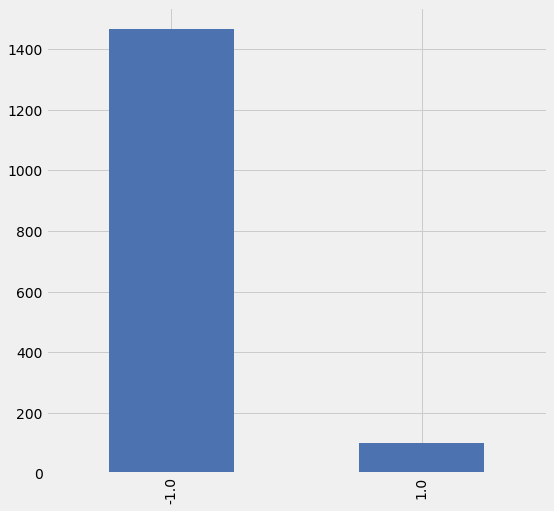

In [11]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
data['Pass/Fail'].value_counts().plot(kind="bar");

Text(0.5, 1.0, 'Correlation heatmap for the Data')

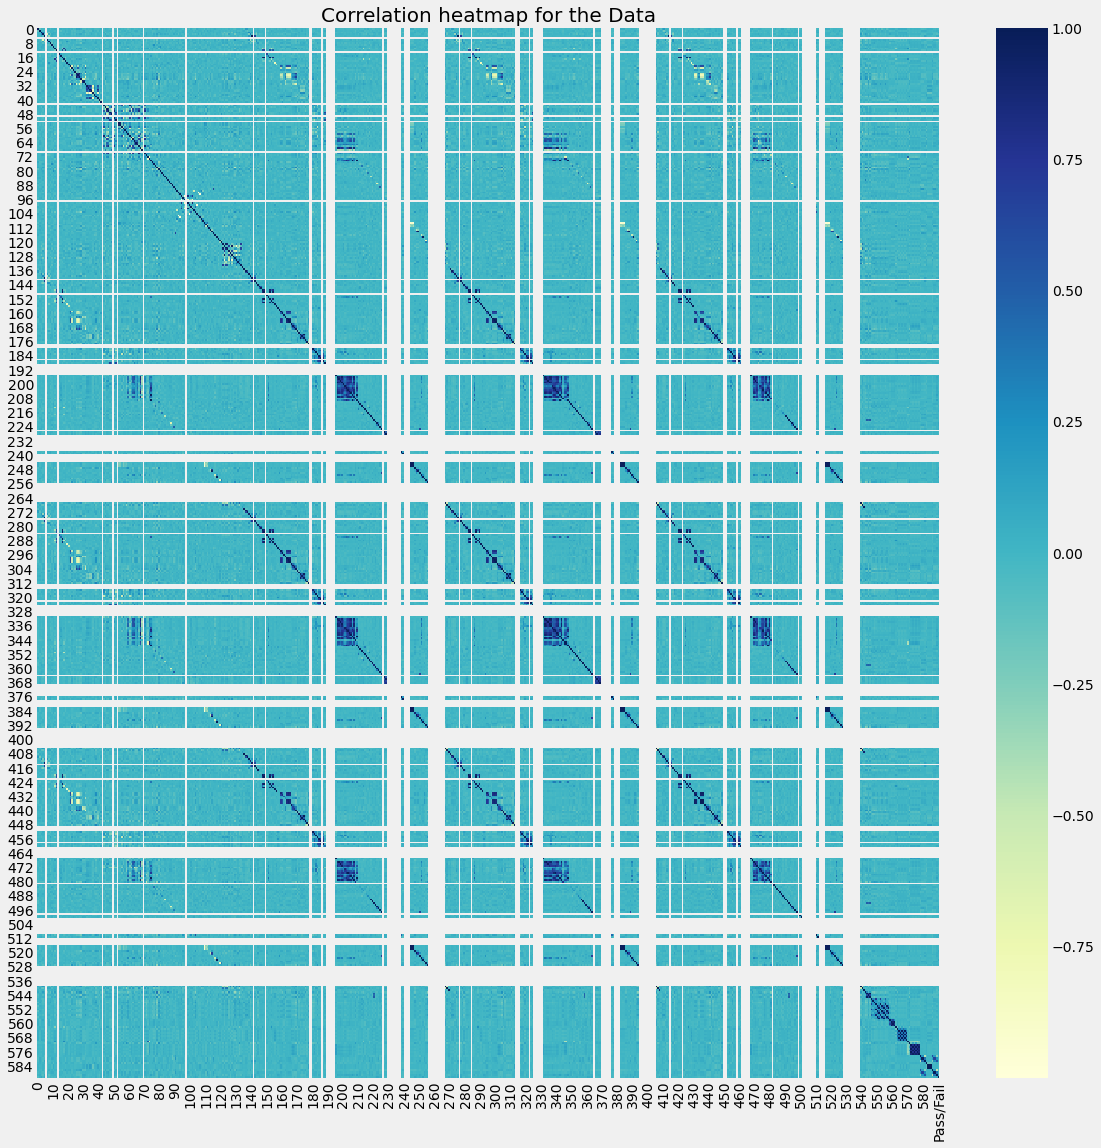

In [12]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

/home/kaustubh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


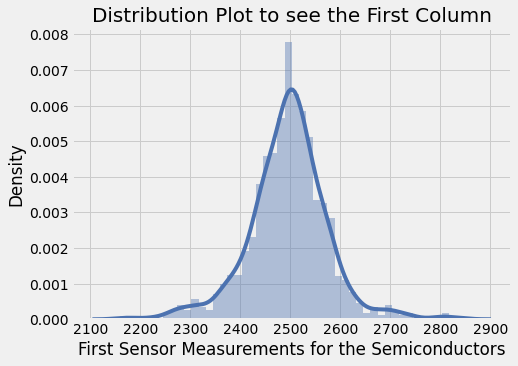

In [13]:

# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['1'])
plt.title('Distribution Plot to see the First Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

/home/kaustubh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


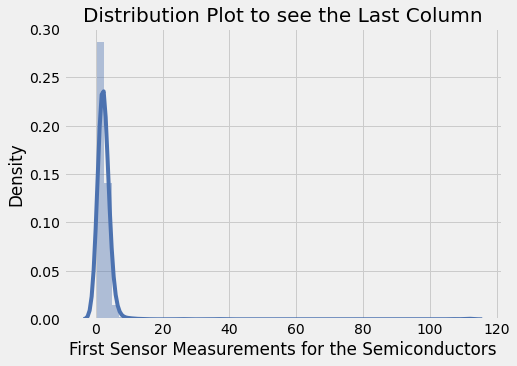

In [14]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['520'])
plt.title('Distribution Plot to see the Last Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

# Data Pre-Processing

In [15]:
#Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [16]:
data = remove_collinear_features(data,0.70)

17 | 11 | 0.8
22 | 21 | 0.71
26 | 25 | 0.81
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.72
54 | 53 | 0.94
60 | 43 | 0.9
60 | 50 | 0.7
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.8
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
73 | 72 | 0.84
96 | 94 | 0.96
98 | 94 | 0.84
98 | 96 | 0.87
101 | 94 | 0.73
101 | 96 | 0.79
101 | 98 | 0.91
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
123 | 121 | 0.94
124 | 121 | 0.89
124 | 123 | 0.85
125 | 122 | 0.7
127 | 122 | 0.96
130 | 122 | 0.84
130 | 127 | 0.79
133 | 121 | 0.71
140 | 4 | 1.0
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.88
154 | 147 | 0.81
154 | 148 | 0.94
154 | 152 | 0.89
155 | 19 | 0.8
163 | 159 | 0.75
164 | 26 | 0.76
164 | 159 | 0.79
164 | 163 | 0.92
165 | 26 | 0.72
165 | 159 | 0.78
165 | 163 | 0.89
165 | 164 | 0.96


435 | 163 | 0.84
435 | 164 | 0.91
435 | 165 | 0.86
435 | 294 | 0.74
435 | 298 | 0.85
435 | 299 | 0.9
435 | 300 | 0.86
435 | 430 | 0.95
435 | 431 | 0.92
435 | 434 | 0.99
436 | 26 | 0.79
436 | 159 | 0.7
436 | 163 | 0.83
436 | 164 | 0.9
436 | 165 | 0.87
436 | 294 | 0.74
436 | 298 | 0.85
436 | 299 | 0.9
436 | 300 | 0.87
436 | 430 | 0.95
436 | 431 | 0.92
436 | 434 | 0.99
436 | 435 | 1.0
437 | 166 | 0.99
437 | 301 | 0.95
439 | 168 | 0.79
439 | 303 | 0.77
440 | 27 | 0.71
440 | 31 | 0.7
440 | 169 | 1.0
440 | 304 | 0.98
441 | 170 | 0.99
441 | 305 | 0.95
442 | 171 | 0.97
442 | 306 | 0.96
443 | 172 | 1.0
443 | 174 | 1.0
443 | 307 | 0.96
443 | 309 | 0.96
444 | 173 | 0.99
444 | 308 | 0.95
445 | 172 | 1.0
445 | 174 | 1.0
445 | 307 | 0.96
445 | 309 | 0.96
445 | 443 | 0.99
446 | 175 | 1.0
446 | 310 | 0.95
447 | 176 | 1.0
447 | 311 | 0.98
448 | 177 | 1.0
448 | 312 | 1.0
452 | 180 | 0.99
452 | 316 | 0.86
453 | 181 | 1.0
453 | 317 | 0.96
454 | 182 | 0.99
454 | 318 | 0.97
455 | 183 | 1.0
455 | 319 | 0.98


In [17]:
x = data.iloc[:,:306]
y = data["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 306)
shape of y: (1567,)


In [18]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 306)
shape of x_test:  (471, 306)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [19]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
# Under Sampling - Check how many failure observations are there
# We have 104 such observations

failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

100


In [22]:
from math import*
 
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
   numerator = sum(a*b for a,b in zip(x,y))
   denominator = square_rooted(x)*square_rooted(y)
   return round(numerator/float(denominator),3)
 
print(cosine_similarity([2,3,1,6], [1,2,3,0]))

0.416
